**MOVIE** **RATING** **PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Load


In [ ]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

Dataset view

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


**DATA**  **CLEANING**

Remove Duplicates

In [ ]:
data.duplicated().sum()

6

To remove Duplicates

In [ ]:
#Handling Duplicate values
data.drop_duplicates(inplace=True)


Handling Missing values

In [ ]:
#Dropping null values
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
data.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


Conversion of data types accordingly

In [ ]:
#Convert Year, Duration, votes to numeric data type
data['Year'] = data['Year'].str.replace(r'\(|\)','', regex=True).astype(int)
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''))
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''))

In [ ]:
data.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**Descriptive Data Analysis**

In [ ]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


**DATA VISUALIZATION**

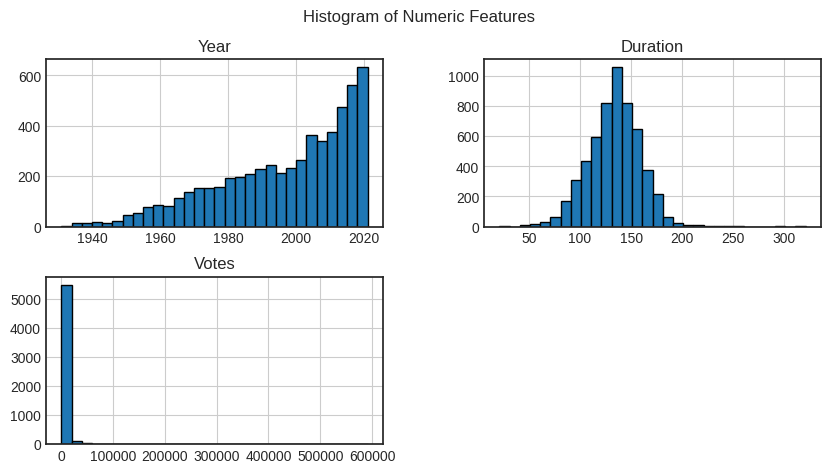

In [ ]:
plt.style.use('seaborn-v0_8-white')
data[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histogram of Numeric Features ')
plt.show()

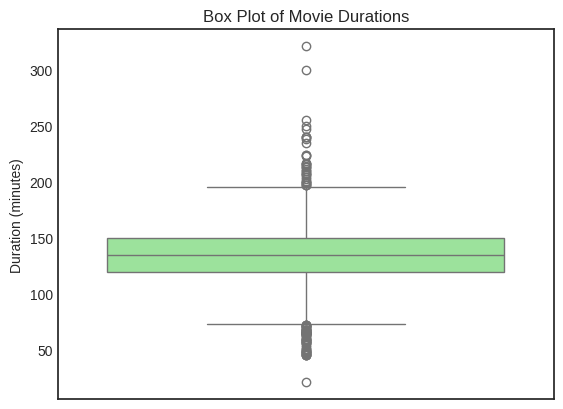

In [ ]:
# Box plot for Duration
sns.boxplot(y='Duration', data=data, color='lightgreen')
plt.title('Box Plot of Movie Durations')
plt.ylabel('Duration (minutes)')
plt.show()

<ipython-input-21-5f05bfbda834>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='Dark2')


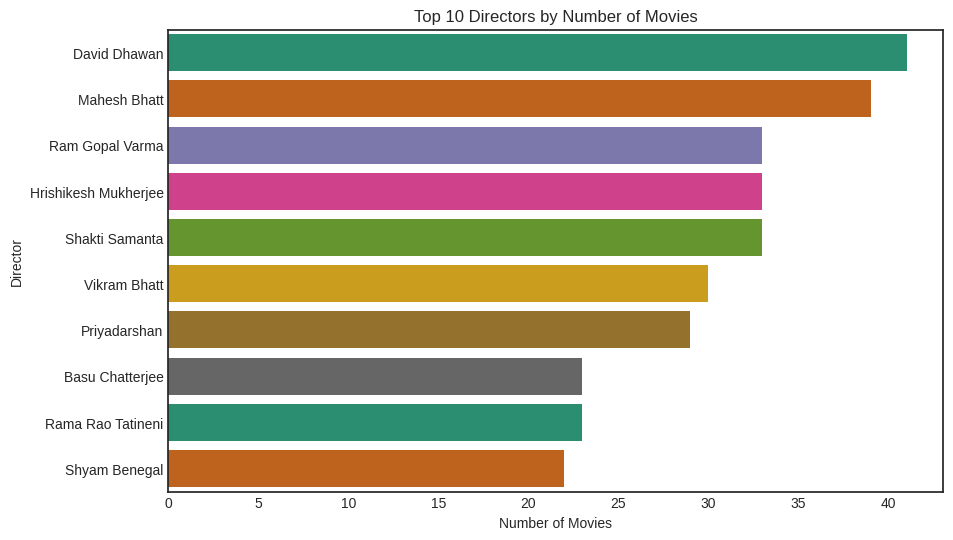

In [ ]:
top_10_directors = data['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='Dark2')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


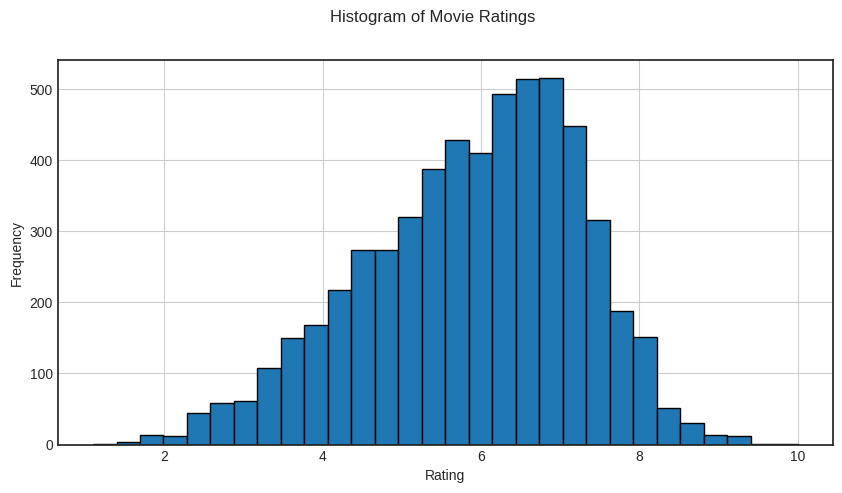

In [ ]:
data['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histogram of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-4c565ff45912>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Dark2')


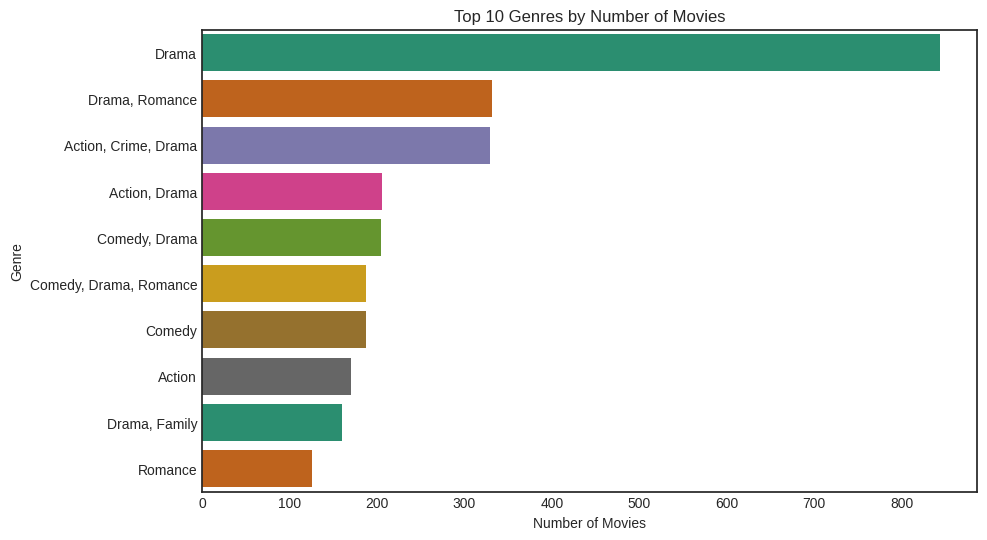

In [ ]:
top_10_genres = data['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Dark2')
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

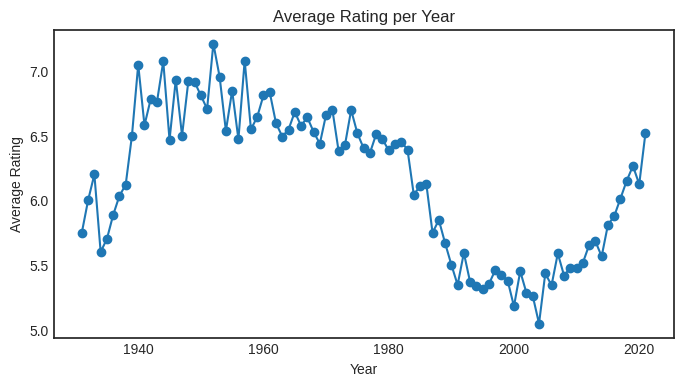

In [ ]:
#Average Rating
average_rating_per_year = data.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], marker='o', linestyle='-')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
combined_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

,count
Mithun Chakraborty,160
Amitabh Bachchan,148
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
Shashi Kapoor,117
Jeetendra,116
Sanjay Dutt,101
Rekha,92
Ajay Devgn,92


<ipython-input-26-0a3a396cca13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')


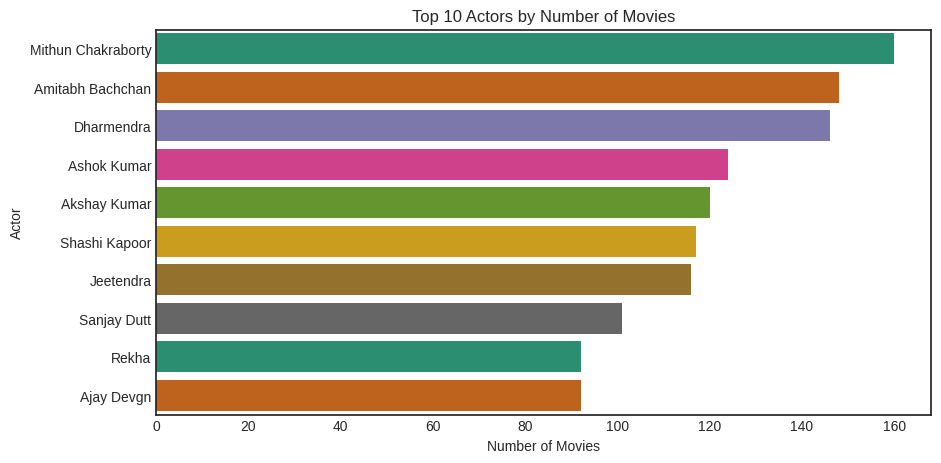

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [ ]:
#High Rated Movies details
high_rating_movies = data[data['Rating'] >= 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,2016,96,"Documentary, Thriller",8.7,1928,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,2020,101,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
...,...,...,...,...,...,...,...,...,...,...
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
14714,Vada Chennai,2018,164,"Action, Crime, Drama",8.5,13120,Vetrimaaran,Dhanush,Ameer Sultan,Radha Ravi
14898,Viraat,2021,150,Crime,8.9,294,Narendra Singh,Kritika Sachdeva,Ravi Jhanghu,Lokesh Tilakdhari
15071,Win Marathon,2018,94,"Drama, Sport",9.0,70,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna


In [ ]:
#Group by Rating and get the count of movies
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts =  rating_counts.sort_values(by='Rating', ascending=False)
print(rating_counts)

    Rating  Number of Movies
11    10.0                 1
10     9.7                 1
9      9.4                 3
8      9.3                 7
7      9.2                 2
6      9.1                 4
5      9.0                 5
4      8.9                 5
3      8.8                 6
2      8.7                 8
1      8.6                16
0      8.5                12


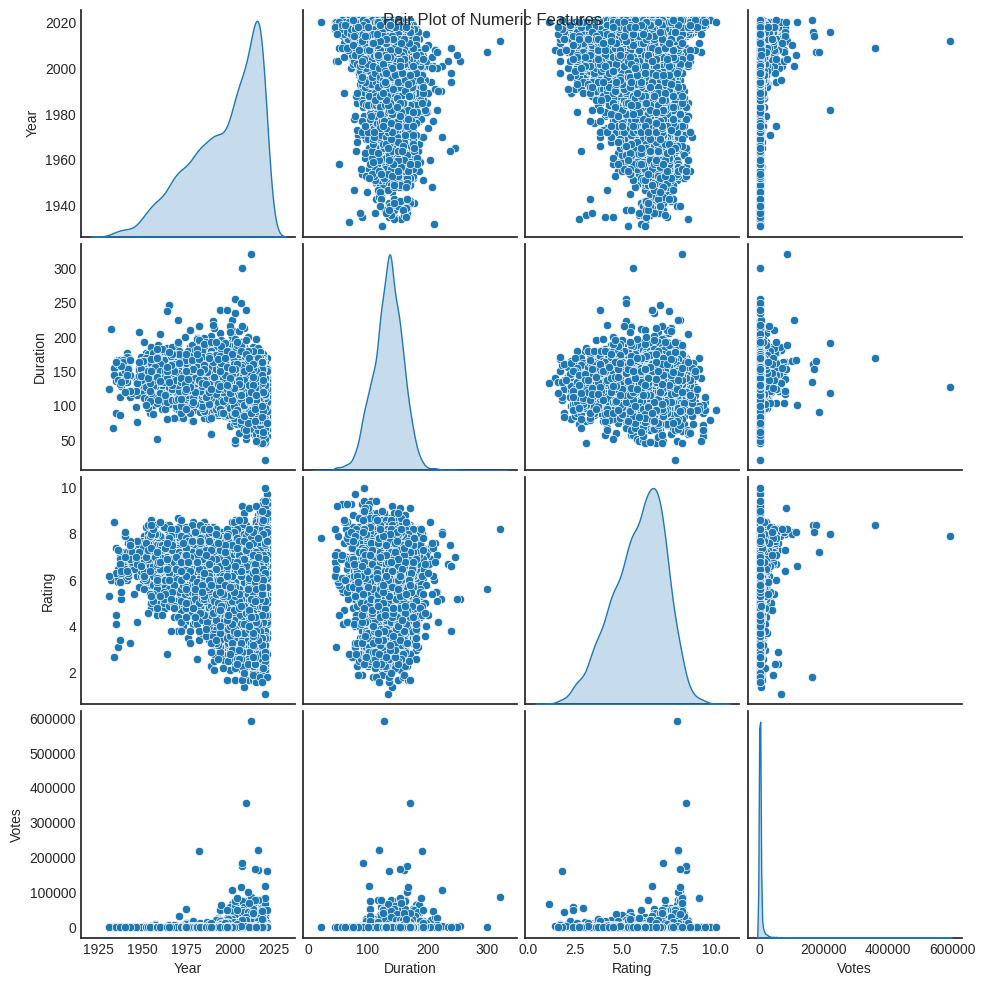

In [ ]:
#Pair plot
sns.pairplot(new_df, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features')
plt.show()

**FEATURE ENGINEERING**

<Axes: >

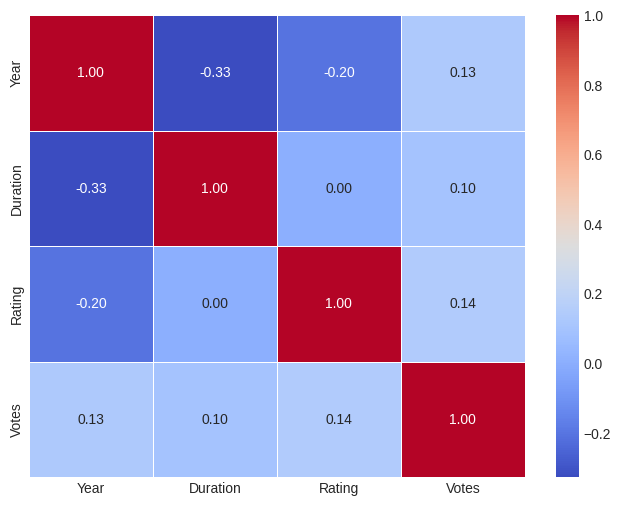

In [ ]:
#Correlation Matrix
new_df = data.drop(columns=['Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'])
corr = new_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)

In [ ]:
#Drop the name of the column
df = data.drop('Name', axis=1)

In [ ]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
#Create new features
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] = Genre_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = Actor3_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] = Director_Average_Rating

In [ ]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Director_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,6.850000,7.000000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,5.420000,4.400000,4.450000,4.400000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,4.788889,5.786667,5.872727,5.313333
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,5.435000,6.933333,6.500000,7.383333
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.883333,5.600000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.725000,6.100000,5.850000,6.100000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,4.157143,5.823077,5.954545,7.250000
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.307692,5.800000,6.050000,6.270000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.481707,4.640000,5.737500,5.225000


**TRAINING** **MODEL**

In [ ]:

from sklearn.model_selection import train_test_split


Data Splitting

In [ ]:
X = df[['Year', 'Duration', 'Votes', 'Genre_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating', 'Director_Average_Rating']]
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data = X_train.join(y_train)
train_data

,Year,Duration,Votes,Genre_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Director_Average_Rating,Rating
9424,2016,143,13,6.415521,8.000000,8.000000,8.000000,8.000000,8.0
12009,1942,153,30,6.415521,6.300000,6.000000,6.750000,6.923077,6.3
4316,1989,147,455,7.533333,6.000000,5.375000,7.200000,6.212500,7.2
6897,1961,139,467,6.242222,6.914286,6.616667,6.828571,6.712500,7.3
2338,2012,74,22,6.415521,6.400000,6.400000,6.400000,5.450000,6.4
...,...,...,...,...,...,...,...,...,...
10263,1979,120,159,6.250000,6.670000,5.968750,6.242857,6.000000,6.0
14280,2010,75,62,5.700000,4.950000,5.700000,5.700000,5.700000,5.7
14355,2005,88,35,5.522222,4.750000,4.100000,5.600000,4.100000,4.1
14818,2018,135,12000,5.640642,5.088889,5.455556,5.625000,5.675000,3.2


Selection of Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X_test = df.loc[X_test.index, ['Year', 'Votes', 'Duration', 'Genre_Average_Rating',
                           'Actor1_Average_Rating', 'Actor2_Average_Rating',
                           'Actor3_Average_Rating', 'Director_Average_Rating']]


In [ ]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['Year', 'Votes', 'Duration', 'Genre_Average_Rating',
       'Actor1_Average_Rating', 'Actor2_Average_Rating',
       'Actor3_Average_Rating', 'Director_Average_Rating'],
      dtype='object')
X_test columns: Index(['Year', 'Votes', 'Duration', 'Genre_Average_Rating',
       'Actor1_Average_Rating', 'Actor2_Average_Rating',
       'Actor3_Average_Rating', 'Director_Average_Rating'],
      dtype='object')


In [ ]:
X_test = X_test[X_train.columns]


In [ ]:
# Ensure all columns are present in the dataset
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Remove extra columns
X_test = X_test[X_train.columns]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Ensure column alignment
X_test = X_test[X_train.columns]

# Linear Regression
fitted_model_lr = LinearRegression()
fitted_model_lr.fit(X_train, y_train)
y_pred_lr = fitted_model_lr.predict(X_test)

# Random Forest
fitted_model_rf = RandomForestRegressor()
fitted_model_rf.fit(X_train, y_train)
y_pred_rf = fitted_model_rf.predict(X_test)


**MODEL EVALUATION**

In [ ]:
from mmap import MADV_SEQUENTIAL
#Evaluating models performance
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


Linear Regression Metrics:
Mean Squared Error: 0.4245437859355626
Mean Absolute Error: 0.4825792183889355
R-squared: 0.7707329592718972

Random Forest Metrics:
Mean Squared Error: 0.34689471201413413
Mean Absolute Error: 0.4051943462897526
R-squared: 0.8126659093774151


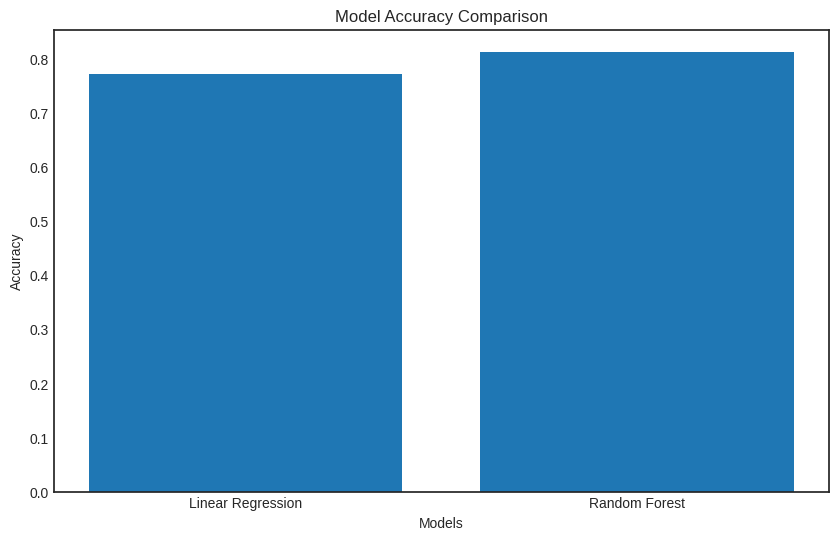

In [ ]:
models = ['Linear Regression', 'Random Forest']
accuracy_scores = [r2_lr, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Actual vs Predicted Analysis

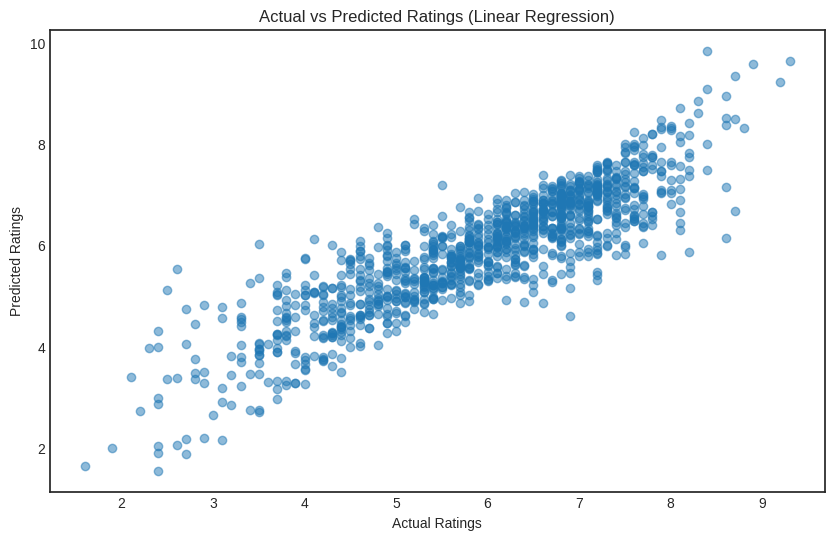

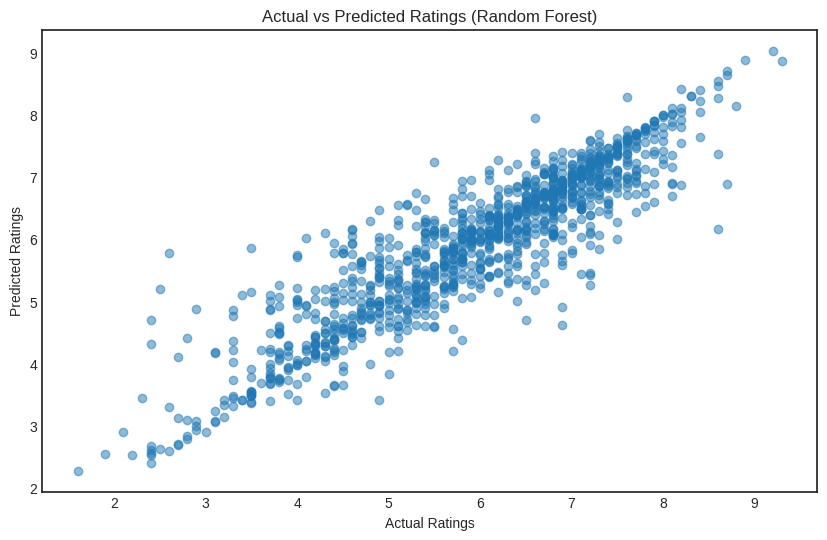

In [ ]:
#Scatter Plot
#Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [ ]:
X.head()

,Year,Duration,Votes,Genre_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Director_Average_Rating
1,2019,109,8,6.415521,6.850000,7.000000,7.000000,7.000000
3,2019,110,35,5.716822,5.420000,4.400000,4.450000,4.400000
5,1997,147,827,6.242222,4.788889,5.786667,5.872727,5.313333
6,2005,142,1086,6.820000,5.435000,6.933333,6.500000,7.383333
8,2012,82,326,5.477778,5.600000,5.883333,5.600000,5.600000


In [ ]:
y.head()

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6


In [ ]:
#Create new trail dataframe
data = {'Year': [2017], 'Votes': [100], 'Duration': [140], 'Genre_Average_Rating':[6.0], 'Actor1_Average_Rating':[5.5], 'Actor2_Average_Rating': [6.5], 'Actor3_Average_Rating':[6.0], 'Director_Average_Rating':[7.0]}
trail_data = pd.DataFrame(data)

In [ ]:
#Predict rating using trial data
predict_rating = fitted_model_rf.predict(trail_data)
print("Predicted Rating:", predict_rating)

Predicted Rating: [6.492]


**Predicted Rating value for trial data frame is 6.492 which is between range 1 to 10 i.e it is between the range of head rating values**